### **20 Newsgroup dataset text classification**

#### Introduction
This Jupyter notebook focuses on the task of text classification using the 20 Newsgroups dataset. 
The dataset comprises around 20,000 newsgroup documents, partitioned across 20 different newsgroups. 
This analysis aims to develop a model that can accurately classify these texts into their respective newsgroups.


#### Setup and Data Loading
In this section, we load the necessary Python libraries and the 20 Newsgroups dataset. 
The dataset is a popular choice for experiments in text applications of machine learning, such as text classification and text clustering.


#### Process
This section details the steps involved in data preprocessing, feature extraction, and modeling. 
It includes text cleaning, vectorization, and applying machine learning algorithms to classify the texts.


#### Results
Here, we present the outcomes of the model, including accuracy metrics and any visualizations that help in understanding the model's performance.


#### Interpretation
In this section, we analyze the results, discussing the effectiveness of the model, 
identifying any areas of improvement, and understanding the implications of the model's performance.


#### Conclusion
This final section summarizes the findings of our analysis, reflects on the efficacy of the model, 
and suggests directions for future research or improvements in the methodology.


**Setup and Data Loading**

In [10]:
#Loading libraries
from sklearn.datasets import fetch_20newsgroups
from fastai.text.all import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
newsgroups_20 = fetch_20newsgroups (subset = 'all', remove=('headers', 'footers', 'quotes'))

In [12]:
df = pd.DataFrame({'text': newsgroups_20.data, 'target': newsgroups_20.target})

**Preliminary Analysis**

In [13]:
print(f"Document count:", len(df))
print(f"Categories count", len(newsgroups_20.target_names))
print(f"Category Names:", newsgroups_20.target_names)



Document count: 18846
Categories count 20
Category Names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [14]:
df['text_length'] = df['text'].apply(len)
average_length = round(df['text'].apply(len).mean(), 2)
print('Avg. length of a document:', average_length)



Avg. length of a document: 1169.67


In [15]:
category_counts = df['target'].value_counts().sort_index()
category_counts.index = [newsgroups_20.target_names[i] 
                         for i in category_counts.index]

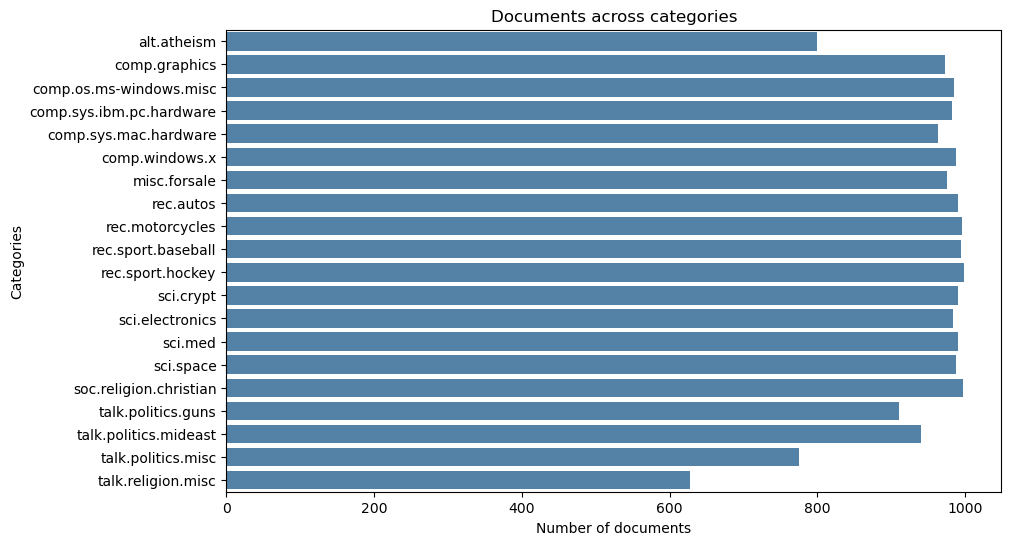

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x = category_counts.values, y = category_counts.index, color = 'steelblue')
plt.title('Documents across categories')
plt.xlabel('Number of documents')
plt.ylabel('Categories')
plt.show()

In [19]:
## This is a whole block of code I initally wanted to run but due to computationally heavy and amount of time required,
## I narrowed the dataset into 50% of the whole.
'''
#prepraring model for fine-tuning
dls_lm = TextDataLoaders.from_df(df, text_col='text', is_lm=True, valid_pct=0.2)

#load awd_lstm model
learn_language_model = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()]).to_fp16()

#fine_tune language model
learn_language_model.fit_one_cycle(1, 2e-2)
learn_language_model.unfreeze()
learn_language_model.fit_one_cycle(1, 1e-3)

#saving the encorder for classifier
learn_language_model.save_encoder('fine_tuned_enc')

#data for classifier training
dls_clas = TextDataLoaders.from_df(df, text_col='text', label_col='target', valid_pct=0.2, text_vocab=dls_lm.vocab)

#training classifier using the fine-tuned encoder
learn_clas = text_classifier_learner(dls_clas, AWD_LSTM, metrics=accuracy).to_fp16()
learn_clas.load_encoder('fine_tuned_enc')
learn_clas.fit_one_cycle(1, 2e-2)
'''


"\n#prepraring model for fine-tuning\ndls_lm = TextDataLoaders.from_df(df, text_col='text', is_lm=True, valid_pct=0.2)\n\n#load awd_lstm model\nlearn_language_model = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()]).to_fp16()\n\n#fine_tune language model\nlearn_language_model.fit_one_cycle(1, 2e-2)\nlearn_language_model.unfreeze()\nlearn_language_model.fit_one_cycle(1, 1e-3)\n\n#saving the encorder for classifier\nlearn_language_model.save_encoder('fine_tuned_enc')\n\n#data for classifier training\ndls_clas = TextDataLoaders.from_df(df, text_col='text', label_col='target', valid_pct=0.2, text_vocab=dls_lm.vocab)\n\n#training classifier using the fine-tuned encoder\nlearn_clas = text_classifier_learner(dls_clas, AWD_LSTM, metrics=accuracy).to_fp16()\nlearn_clas.load_encoder('fine_tuned_enc')\nlearn_clas.fit_one_cycle(1, 2e-2)\n"

**AWD_LSTM**

In [18]:
#samping a 50% of the dataset
df_sampled = df.sample(frac=0.5, random_state=42)

#preprocessing the model for fine tuning
dls_lm = TextDataLoaders.from_df(df_sampled, text_col='text', is_lm=True, valid_pct=0.2, bs=48)

#load AWD_LSTM model
learn_language_model = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()]).to_fp16()

#reducing learning rate and epoch for faster training
learn_language_model.fit_one_cycle(1, 2e-2)
learn_language_model.unfreeze()
learn_language_model.fit_one_cycle(1, 1e-3)

#saving encoder for classifier
learn_language_model.save_encoder('fine_tuned_enc')

#data for classifier training
dls_clas = TextDataLoaders.from_df(df_sampled, text_col='text', label_col='target', valid_pct=0.2, text_vocab=dls_lm.vocab, bs=48)

#training classifier with fine tuned encoder
learn_clas = text_classifier_learner(dls_clas, AWD_LSTM, metrics=accuracy).to_fp16()
learn_clas.load_encoder('fine_tuned_enc')
learn_clas.fit_one_cycle(1, 2e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.381886,4.249655,0.256421,70.081215,31:44


C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.911478,4.021715,0.285542,55.796700,31:34


C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,1.542954,1.245647,0.617834,08:35


C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\lifet\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps

**Traditional NLP Model**

In [21]:
#Loading libraries for NLP model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [23]:
#samping 50% of the dataset - recalling in case
df_sampled = df.sample(frac=0.5, random_state=42)

#preprocessing data into test and train
X_train, X_test, y_train, y_test = train_test_split(df_sampled['text'], df_sampled['target'], test_size=0.2, random_state=42)

#creating tfidf vectorizer and transforming data
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#training traditional model - multinominal nb 
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

#evaluating model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=newsgroups_20.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.65      0.47      0.54        66
           comp.graphics       0.68      0.52      0.59       102
 comp.os.ms-windows.misc       0.58      0.61      0.60       106
comp.sys.ibm.pc.hardware       0.63      0.65      0.64       103
   comp.sys.mac.hardware       0.62      0.65      0.64        97
          comp.windows.x       0.66      0.86      0.75        88
            misc.forsale       0.79      0.75      0.77       113
               rec.autos       0.65      0.67      0.66        93
         rec.motorcycles       0.84      0.61      0.71       115
      rec.sport.baseball       0.46      0.88      0.60        80
        rec.sport.hockey       0.88      0.85      0.87        99
               sci.crypt       0.79      0.72      0.75       100
         sci.electronics       0.62      0.55      0.58       100
                 sci.med       0.70      0.80      0.75        90
         


#### Interpretation

The text classification model, applied to the 20 Newsgroups dataset, shows a diverse range of results across different categories. The dataset, consisting of 18,846 documents across 20 categories, presents a significant challenge due to the diversity and complexity of the content.

#### Model Performance
- The model achieved an overall accuracy of 67%. This indicates a reasonable level of performance, especially considering the variety of topics covered in the dataset.
- The f1-scores across categories vary significantly, suggesting that the model performs better on certain topics than others. For example, categories like 'talk.religion.misc' have a high precision but extremely low recall, indicating a tendency of the model to be overly cautious in predicting this category.

#### Category-wise Analysis
- **High Performance Categories:** Categories such as 'sci.space', 'talk.politics.mideast', and 'rec.sport.hockey' show high f1-scores, indicating effective learning and prediction by the model in these areas.
- **Low Performance Categories:** On the other hand, categories like 'talk.religion.misc' and 'alt.atheism' have lower f1-scores. This could be due to a smaller number of training samples or more ambiguous content in these categories.

#### Potential Biases and Limitations
- The imbalance in recall and precision in some categories suggests a potential bias in the model towards certain types of content. For instance, the high precision but low recall in 'talk.religion.misc' could imply that the model is too conservative in classifying documents into this category.
- The warnings about deprecated functions and limitations due to the absence of CUDA support suggest that the model might not be leveraging the full potential of hardware acceleration, possibly affecting its performance.

#### Conclusion
The overall performance of the model is commendable, but there is room for improvement, especially in balancing recall and precision across categories. Addressing the limitations in computational resources and further tuning the model parameters could enhance the model's performance. Additionally, exploring different feature extraction techniques or advanced modeling approaches like transformer-based models might yield better results.
